<a href="https://colab.research.google.com/github/Aryanshukla-09/Module5_Lab1/blob/main/Mod5_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Module 5 Lab 1

Non Linear Support Vector Machines

In [1]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

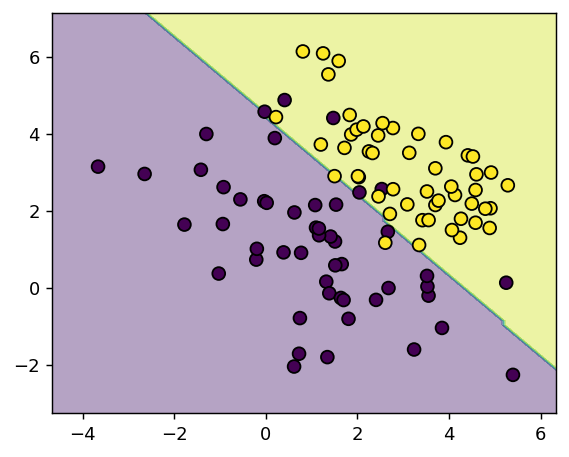

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

<ipython-input-3-bb653c8acc51>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


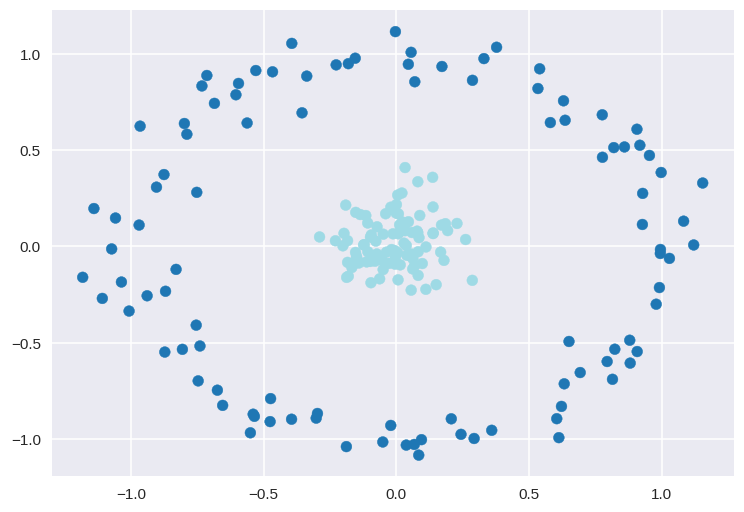

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

<ipython-input-4-bb653c8acc51>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


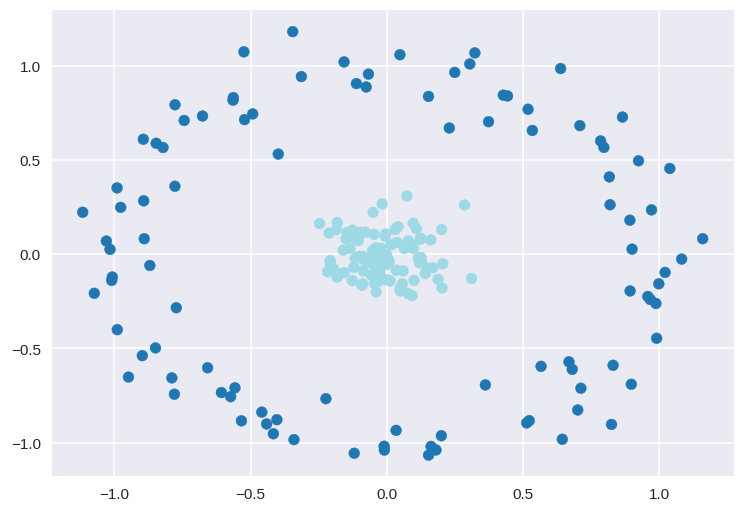

In [4]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

In [5]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [6]:
X_new = np.hstack((X, Z))

In [7]:
import plotly.graph_objects as go

In [8]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

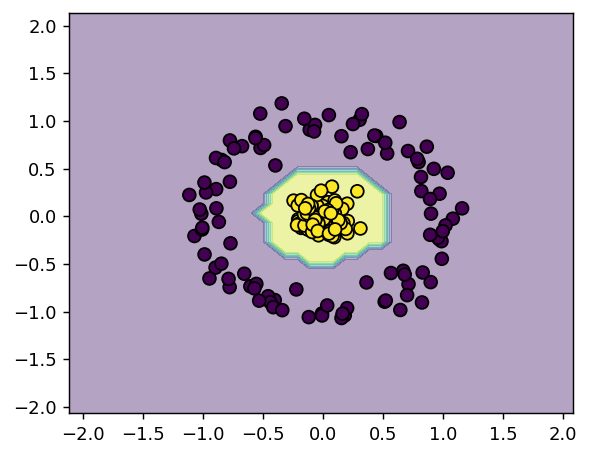

In [9]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

In [10]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Things to try out:

1)Try to run the same experiment after filtering different features, 2 at a time.

2)Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

In [11]:
# Experiment 1: Filtering different features, 2 at a time
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Filter features, 2 at a time
filtered_X = X[:, [0, 2]]  # Selecting the first and third feature

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear')

# Fit the classifier to the training data
svm_linear.fit(X_train, y_train)

# Evaluate the classifier on the testing data
accuracy = svm_linear.score(X_test, y_test)
print("Linear Kernel Accuracy:", accuracy)


# Experiment 2: Using different kinds of kernels for the SVM
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

for kernel in kernels:
    try:
        # Create an SVM classifier with the specified kernel
        svm = SVC(kernel=kernel)

        # Fit the classifier to the training data
        svm.fit(X_train, y_train)

        # Evaluate the classifier on the testing data
        accuracy = svm.score(X_test, y_test)
        print("Kernel:", kernel)
        print("Accuracy:", accuracy)
    except ValueError as e:
        print(f"Error with {kernel} kernel: {e}")

Linear Kernel Accuracy: 1.0
Kernel: linear
Accuracy: 1.0
Kernel: poly
Accuracy: 0.9666666666666667
Kernel: rbf
Accuracy: 1.0
Kernel: sigmoid
Accuracy: 0.3
Error with precomputed kernel: Precomputed matrix must be a square matrix. Input is a 120x2 matrix.
